# Prediction_Of_Engagement_Score
## Problem Statement
* To develop the machine learning approach to predict the engagement score of the video on the user level.

In [1]:
## Importing Liabraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## machine learning
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
dftrain = pd.read_csv("engagement score.csv")
dftest  = pd.read_csv("engagement_test.csv")

In [4]:
dftest.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views
0,89198,7986,12,42,14,Male,Student,180,138
1,89199,11278,34,115,14,Male,Student,230,840
2,89200,17245,8,110,44,Female,Working Professional,280,628
3,89201,9851,16,137,18,Male,Student,270,462
4,89202,16008,34,96,47,Female,Other,230,840


In [5]:
dftrain.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,1,19990,37,128,24,Male,Student,180,1000,4.33
1,2,5304,32,132,14,Female,Student,330,714,1.79
2,3,1840,12,24,19,Male,Student,180,138,4.35
3,4,12597,23,112,19,Male,Student,220,613,3.77
4,5,13626,23,112,27,Male,Working Professional,220,613,3.13


In [6]:
''' shape function, which helps us to find the shape or size of an array or matrix. 
    The function "shape" returns the shape of an array. The shape is a tuple of integers.
    '''
dftrain.shape

(89197, 10)

### In out Dataset there is 89197 Observation and 10 Features.

### Project Planning
When starting any project, I like to outline the steps that I plan to take. Below is the rough outline that I created for this project using commented cells.

In [7]:
# Understand nature of the data .info() .describe()
# Histograms  
# Value counts 
# HeatMap 
# Correlation between the metrics 
 

# Feature engineering 
# preprocess data together or use a transformer? 
    # use label for train and test   
# Scaling?



In [8]:
dftrain.isnull().sum()

row_id              0
user_id             0
category_id         0
video_id            0
age                 0
gender              0
profession          0
followers           0
views               0
engagement_score    0
dtype: int64

### There is no Missing Values

In [9]:
## gives information about the data types,columns, null value counts, memory usage etc
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89197 entries, 0 to 89196
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_id            89197 non-null  int64  
 1   user_id           89197 non-null  int64  
 2   category_id       89197 non-null  int64  
 3   video_id          89197 non-null  int64  
 4   age               89197 non-null  int64  
 5   gender            89197 non-null  object 
 6   profession        89197 non-null  object 
 7   followers         89197 non-null  int64  
 8   views             89197 non-null  int64  
 9   engagement_score  89197 non-null  float64
dtypes: float64(1), int64(7), object(2)
memory usage: 6.8+ MB


### Observation -:
* We can see here there are no any missing values in the dataset.
* There are total 89197 observations in the dataset.
* There are total 9 independent varibales and engagement_score is the dependent variable.
* There is two categorical variables i.e. **gender and profession.** And Remaning Numeric variables.

In [10]:
''' The describe() method is used for calculating some statistical data
     like percentile, mean and std of the numerical values of the Series or DataFrame. 
     '''
dftrain.describe()

,row_id,user_id,category_id,video_id,age,followers,views,engagement_score
count,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000
mean,44599.000000,13881.909806,18.323733,77.715383,24.848616,252.460172,502.980268,3.487797
std,25749.100318,8005.582771,11.675154,48.469656,8.955535,46.094468,268.569482,0.863498
min,1.000000,1.000000,1.000000,1.000000,10.000000,160.000000,30.000000,0.000000
25%,22300.000000,6945.000000,8.000000,34.000000,18.000000,230.000000,229.000000,2.900000
50%,44599.000000,13892.000000,16.000000,76.000000,23.000000,240.000000,467.000000,3.710000
75%,66898.000000,20819.000000,26.000000,120.000000,32.000000,280.000000,714.000000,4.150000
max,89197.000000,27734.000000,47.000000,175.000000,68.000000,360.000000,1000.000000,5.000000


### Conclusion :-
* There is not very difference in Mean and Median [50 th percentile ] .
* All Features Count is same i.e. 89197 so in our dataset there is no missing Values.


In [11]:
#quick way to separate numeric columns
dftrain.describe().columns

Index(['row_id', 'user_id', 'category_id', 'video_id', 'age', 'followers',
       'views', 'engagement_score'],
      dtype='object')

## Data Set Description.
### Problem Statement
ABC is an online content sharing platform that enables users to create, upload and share the content in the form of videos. It includes videos from different genres like entertainment, education, sports, technology and so on. The maximum duration of video is 10 minutes.

Users can like, comment and share the videos on the platform. 

Based on the user’s interaction with the videos, engagement score is assigned to the video with respect to each user. Engagement score defines how engaging the content of the video is. 

Understanding the engagement score of the video improves the user’s interaction with the platform. It defines the type of content that is appealing to the user and engages the larger audience.
#### Objective
The main objective of the problem is to develop the machine learning approach to predict the engagement score of the video on the user level.

Variable	         Description
row_id 	Unique identifier of the row
user_id	Unique identifier of the user
category_id	Category of the video
video_id	Unique identifier of the video
age	Age of the user
gender	Gender of the user (Male and Female)
profession	Profession of the user (Student, Working Professional, Other)
followers	No. of users following a particular category
views	Total views of the videos present in the particular category
engagement_score	Engagement score of the video for a user


**Variable	              Description**
* **row_id :-**	        Unique identifier of the row
* **user_id :-**	        Unique identifier of the user
* **category_id :-**	    Category of the video
* **video_id :-**        Unique identifier of the video
* **age	   :-**           Age of the user
* **gender	:-**        Gender of the user (Male and Female)
* **profession :-**	    Profession of the user (Student, Working Professional, Other)
* **followers	  :-**      No. of users following a particular category
* **views	       :-**     Total views of the videos present in the particular category
* **engagement_score :-**	Engagement score of the video for a user



## Data_Preprocessing.
## EDA
### Lets us plot Data Distribution of every features.

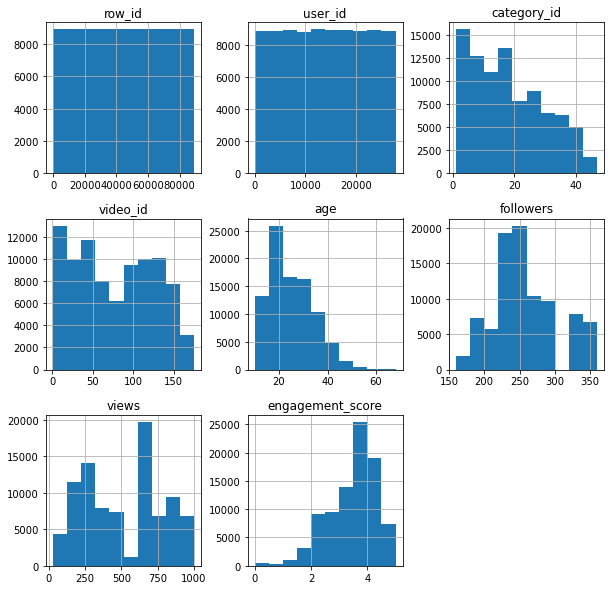

In [12]:
p =dftrain.hist(figsize = (10,10))

### Observation :-
* The age features says that the most of the users is lies in the age of  10 to 30 years . 
* The age feature is positive Skewed.
* In the followers feature the No.of users following in 180 to 300 category. and It's Quite Normal distribution or symmetrical Distribution.
* In the Views Features the total views of a particular video category is 250 to 500 and 625 to 875. Quite Normal Distribution. 
* And our Target variable i.e. engagement_score for a particular user is lies in 2 to 4.5. And its Negative Skewed or Left Skewed.

### Data Preprocessing for Model
1) Drop null values from Embarked.

2) Include only relevant variables (Since we have limited data, I wanted to exclude things like row_id and user_id so that we could have a reasonable number of features for our models to deal with)
  
 **Variables:    'row_id', 'user_id', 'category_id', 'video_id', 'age', 'followers',
       'views', 'engagement_score'**

3) Do categorical transforms on all data. Usually we would use a transformer, but with this approach we can ensure that our traning and test data have the same colums. We also may be able to infer something about the shape of the test data through this method. I will stress, this is generally not recommend outside of a competition (use onehot encoder).

4) Impute data with mean for fare and age (Should also experiment with median)

5) Normalized fare using logarithm to give more semblance of a normal distribution

6) Scaled data 0-1 with standard scaler

<AxesSubplot:>

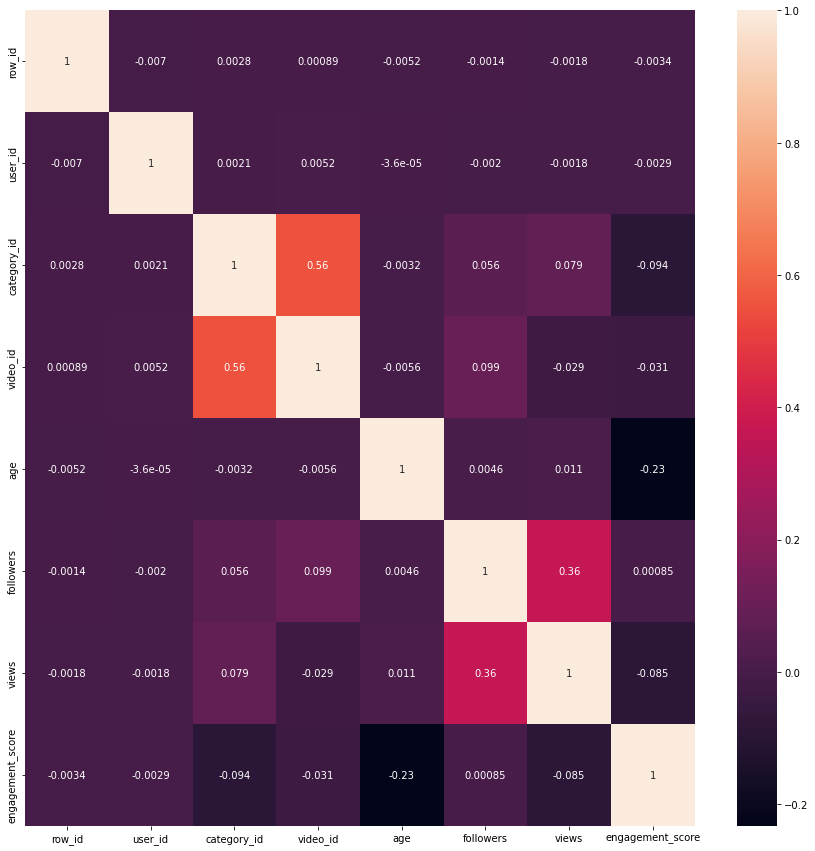

In [13]:
# checking the Correlation of our variables  

corr = dftrain.corr() 
plt.subplots(figsize=(15,15))
sns.heatmap(corr, annot=True) 


### Observations :-
* Age feature is negative correlated to our target feature i.e Engagement score.
* Followers and Views are positive Correlated.
* Age and Views are Quite Positive Correlated.
* Engagement_score and Category_id , Views are Negativaly Correlated.

In [14]:
# you can do the same as here 
dftrain.corr().style.background_gradient(cmap='coolwarm')

,row_id,user_id,category_id,video_id,age,followers,views,engagement_score
row_id,1.000000,-0.006953,0.002833,0.000891,-0.005199,-0.001374,-0.001815,-0.003368
user_id,-0.006953,1.000000,0.002139,0.005232,-0.000036,-0.002026,-0.001843,-0.002900
category_id,0.002833,0.002139,1.000000,0.556550,-0.003152,0.056432,0.079321,-0.094288
video_id,0.000891,0.005232,0.556550,1.000000,-0.005615,0.098778,-0.029448,-0.030552
age,-0.005199,-0.000036,-0.003152,-0.005615,1.000000,0.004623,0.011042,-0.232626
followers,-0.001374,-0.002026,0.056432,0.098778,0.004623,1.000000,0.360808,0.000855
views,-0.001815,-0.001843,0.079321,-0.029448,0.011042,0.360808,1.000000,-0.084679
engagement_score,-0.003368,-0.002900,-0.094288,-0.030552,-0.232626,0.000855,-0.084679,1.000000


In [15]:
# look at numeric and categorical values separately 
df_num = dftrain[['row_id', 'user_id', 'category_id', 'video_id', 'age', 'followers',
       'views', 'engagement_score']]
df_cat = dftrain[['profession','gender']]

C:\Users\sanket\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


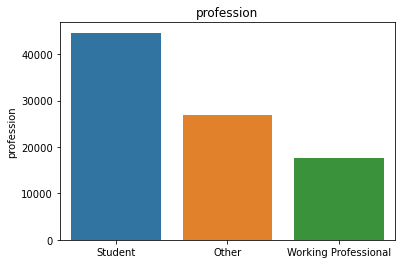

C:\Users\sanket\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


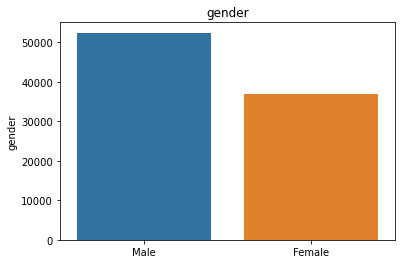

In [16]:
for i in df_cat.columns:
    sns.barplot(df_cat[i].value_counts().index,df_cat[i].value_counts()).set_title(i)
    plt.show()\
    

In [17]:
## Let See Count of Categorical variable Unique Values.
dftrain['gender'].value_counts()

Male      52397
Female    36800
Name: gender, dtype: int64

In [18]:
dftrain['profession'].value_counts()

Student                 44638
Other                   26840
Working Professional    17719
Name: profession, dtype: int64

## Observation:-
* In Gender the Male Users is more than Female Users.
* In Profession Feature Most of the Student Users are Used.

In [19]:
pd.pivot_table(dftrain, index = 'gender', columns = 'profession', aggfunc ='count')

age                              category_id          \
profession  Other Student Working Professional       Other Student   
gender                                                               
Female      11199   18307                 7294       11199   18307   
Male        15641   26331                10425       15641   26331   

                                engagement_score                               \
profession Working Professional            Other Student Working Professional   
gender                                                                          
Female                     7294            11199   18307                 7294   
Male                      10425            15641   26331                10425   

           followers  ...               row_id user_id          \
profession     Other  ... Working Professional   Other Student   
gender                ...                                        
Female         11199  ...                 7294   11199   18307   
Male           15641  ...                10425   15641   26331   

                                video_id                               views  \
profession Working Professional    Other Student Working Professional  Other   
gender                                                                         
Female                     7294    11199   18307                 7294  11199   
Male                      10425    15641   26331                10425  15641   

                                         
profession Student Working Professional  
gender                                   
Female       18307                 7294  
Male         26331                10425  

[2 rows x 24 columns]

# Feature engineering
## Converting catagorical data into numeric data
* For Gender and Profession feature we are going to use one hot encoder.

### One hot Encoding
* A one hot encoding is a representation of categorical variables as binary vectors.
* One-Hot Encoding is the process of creating dummy variables.
* That’s primarily the reason we need to convert categorical columns to numerical columns so that a machine learning algorithm understands it. This process is called categorical encoding.

In [20]:
categorical_cols = ['profession','gender']

In [21]:
dftrain = pd.get_dummies(dftrain, columns = categorical_cols)

In [22]:
dftrain.head()

,row_id,user_id,category_id,video_id,age,followers,views,engagement_score,profession_Other,profession_Student,profession_Working Professional,gender_Female,gender_Male
0,1,19990,37,128,24,180,1000,4.33,0,1,0,0,1
1,2,5304,32,132,14,330,714,1.79,0,1,0,1,0
2,3,1840,12,24,19,180,138,4.35,0,1,0,0,1
3,4,12597,23,112,19,220,613,3.77,0,1,0,0,1
4,5,13626,23,112,27,220,613,3.13,0,0,1,0,1


In [23]:
dftest = pd.get_dummies(dftest, columns = categorical_cols)

In [24]:
dftest.head()

,row_id,user_id,category_id,video_id,age,followers,views,profession_Other,profession_Student,profession_Working Professional,gender_Female,gender_Male
0,89198,7986,12,42,14,180,138,0,1,0,0,1
1,89199,11278,34,115,14,230,840,0,1,0,0,1
2,89200,17245,8,110,44,280,628,0,0,1,1,0
3,89201,9851,16,137,18,270,462,0,1,0,0,1
4,89202,16008,34,96,47,230,840,1,0,0,1,0


In [25]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89197 entries, 0 to 89196
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   row_id                           89197 non-null  int64  
 1   user_id                          89197 non-null  int64  
 2   category_id                      89197 non-null  int64  
 3   video_id                         89197 non-null  int64  
 4   age                              89197 non-null  int64  
 5   followers                        89197 non-null  int64  
 6   views                            89197 non-null  int64  
 7   engagement_score                 89197 non-null  float64
 8   profession_Other                 89197 non-null  uint8  
 9   profession_Student               89197 non-null  uint8  
 10  profession_Working Professional  89197 non-null  uint8  
 11  gender_Female                    89197 non-null  uint8  
 12  gender_Male       

In [26]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11121 entries, 0 to 11120
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   row_id                           11121 non-null  int64
 1   user_id                          11121 non-null  int64
 2   category_id                      11121 non-null  int64
 3   video_id                         11121 non-null  int64
 4   age                              11121 non-null  int64
 5   followers                        11121 non-null  int64
 6   views                            11121 non-null  int64
 7   profession_Other                 11121 non-null  uint8
 8   profession_Student               11121 non-null  uint8
 9   profession_Working Professional  11121 non-null  uint8
 10  gender_Female                    11121 non-null  uint8
 11  gender_Male                      11121 non-null  uint8
dtypes: int64(7), uint8(5)
memory usage: 662.6 KB


### Observation :-
* That is all the Features are Numeric in Nature.

In [27]:
# dftrain['engagement_score']=dftrain['engagement_score'].astype(int)

In [28]:
# dftrain['engagement_score']

## Splitting data into train and test

In [37]:
X_train = dftrain.drop(['engagement_score','row_id'], axis=1)
Y_train = dftrain["engagement_score"]
X_test  = dftest.drop("row_id", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((89197, 11), (89197,), (11121, 11))

## standardization of data or normalision of data

In [38]:
from sklearn.preprocessing import StandardScaler
std_x=StandardScaler()
X_train=std_x.fit_transform(X_train)
X_test=std_x.fit_transform(X_test)

## Model Building


In [40]:
# using random forest
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=100,random_state=0)
regressor.fit(X_train,Y_train)
Y_pred=regressor.predict(X_test)
Y_pred

array([3.9298, 3.1954, 3.0657, ..., 3.9767, 3.8377, 3.1195])

## Checking the performence of the model

In [41]:
from sklearn.metrics import r2_score
score=regressor.score(X_train,Y_train)
print('R2 score is = ',score)

R2 score is =  0.9148955983324647


In [43]:
from sklearn.svm import SVR

In [48]:
submission = pd.DataFrame({
        "row_id": dftest["row_id"],
        "engagement_score": Y_pred
    })
submission.to_csv('submission.csv', index=False)